In [1]:
import os
import shutil
import urbs
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import itertools

In [5]:
# User preferences
result_folder = os.path.join("result", "SunCable-20201227T0415")
scenario_years = [2019, 2030]
stf_min = 2019

In [8]:
result_file = "scenario_2030_p0_cab3800.h5"

In [9]:
year = result_file[:-3].split("_")[1]
scen = "_".join(result_file[:-3].split("_")[2:])
    
# Read output file
if year == "2019":
    writer_path = os.path.abspath(os.path.join(result_folder, os.pardir, "URBS_" + year + ".xlsx"))
else:
    writer_path = os.path.abspath(os.path.join(result_folder, os.pardir, "URBS_" + scen + ".xlsx"))
writer = pd.ExcelWriter(writer_path, engine='openpyxl') 
    
# Read in results
urbs_path = os.path.join(result_folder, result_file)
helpdf = urbs.load(urbs_path)
df_result = helpdf._result
df_data = helpdf._data

In [45]:
# Before losses
ts_0 = df_data["supim"][("Tennant Creek", "Solar")][2030][1:] * df_result["cap_pro"].loc[(2030,"Tennant Creek", "Solar_PV")]
ts_0_sorted = sorted(ts_0, reverse=True)
# After PV losses
ts_1 = df_result["e_pro_out"].loc[(slice(None),2030,"Tennant Creek","Solar_PV","Elec")]
ts_1_sorted = sorted(ts_1, reverse=True)
# Start of cable
ts_2 = df_result["e_tra_in"].loc[(slice(None),2030,"Darwin","Singapore","DC_CAB","Elec")]
ts_2_sorted = sorted(ts_2, reverse=True)
# End of cable
ts_3 = df_result["e_tra_out"].loc[(slice(None),2030,"Darwin","Singapore","DC_CAB","Elec")]
ts_3_sorted = sorted(ts_3, reverse=True)

# demand
ts_d = df_data["demand"][("Singapore", "Elec")][2030][1:]
ts_d_sorted = sorted(ts_d, reverse=True)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\siala\Anaconda3\envs\urbs\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


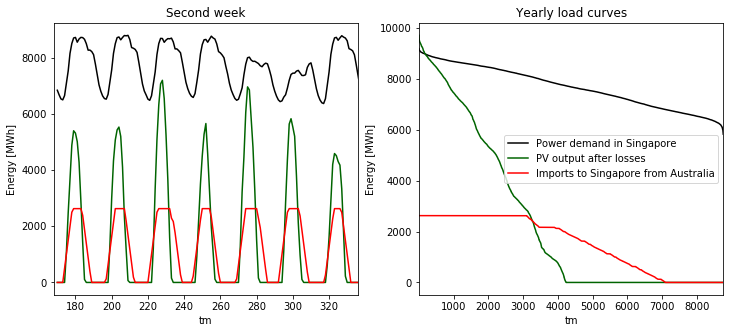

In [47]:
# Plot the sorted/unsorted side by side
fig1 = plt.figure(figsize=[12, 5])
ax1a = fig1.add_subplot(1,2,1)
ax1a.set_xlim(168, 336)
ax1a.set_xlabel("tm")
#ax1a.set_ylim(0, 150)
ax1a.set_ylabel("Energy [MWh]")
ax1a.set_title("Second week")
plt.plot(ts_d[169:337], color="black")
#plt.plot(ts_0[169:337], color="blue")
plt.plot(ts_1[169:337], color="darkgreen")
#plt.plot(ts_2[169:337], color="orange")
plt.plot(ts_3[169:337], color="red")

fig1.add_subplot(1,2,2)
ax1b = fig1.add_subplot(1,2,2)
ax1b.set_xlim(1, 8760)
ax1b.set_xlabel("tm")
#ax1b.set_ylim(0, 150)
ax1b.set_ylabel("Energy [MWh]")
ax1b.set_title("Yearly load curves")
plt.plot(ts_d_sorted, color="black")
#plt.plot(ts_0_sorted, color="blue")
plt.plot(ts_1_sorted, color="darkgreen")
#plt.plot(ts_2_sorted, color="orange")
plt.plot(ts_3_sorted, color="red")
ax1b.legend(["Power demand in Singapore", "PV output after losses", "Imports to Singapore from Australia"])

In [57]:
df = pd.DataFrame()#ts_d, ts_1, ts_3)
df["Demand"] = ts_d#[("Singapore", "Elec")]
df["Demand sorted"] = ts_d_sorted
df["PV output"] = ts_1
df["PV output sorted"] = ts_1_sorted
df["imports"] = ts_3
df["imports sorted"] = ts_3_sorted

In [59]:
df.head()

,Demand,Demand sorted,PV output,PV output sorted,imports,imports sorted
t,,,,,,
1,6674.858898,9197.612666,0.0,9717.774987,500.000000,2627.479897
2,6582.082880,9165.089889,0.0,9662.093300,1000.000000,2627.479897
3,6396.249720,9162.955768,0.0,9617.023220,1136.881749,2627.479897
4,6214.917300,9149.953568,0.0,9590.041728,636.881749,2627.479897
5,6136.550469,9141.379014,0.0,9581.814446,1127.479897,2627.479897


In [60]:
df.to_csv("ts.csv", decimal=",", sep=";")